# Tarea 4 - Optimizadores y curvas de aprendizaje
##### ITESM - MCC
##### Tópicos selectos de AI

## Carlos E. Hdz Rincón - A011181616


## Código preparatorio
Incluye funciones que permitirán enfocarnos más en las pruebas que en configurar cada una de ellas.


In [0]:
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
from sklearn.metrics import classification_report
import time


In [0]:
def prepare_sequential_model(optimizer: str="adam"):
    model_to_fit = tf.keras.models.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(1024,activation=tf.nn.relu),
                                tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

    model_to_fit.compile(optimizer=optimizer,
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])
    return model_to_fit

In [0]:
def train_model(model_to_fit, n_epochs, n_batch, train_data: tuple, test_data: tuple):
    t = time.process_time()
    
    trained_model = model_to_fit.fit(train_data[0],
                                     train_data[1],
                                     validation_data=test_data,
                                     epochs=n_epochs, batch_size=n_batch)
    
    elapsed_time = time.process_time() - t
    
    print(f"Training time: {elapsed_time} s.")
    return trained_model

In [0]:
def graph_loss_accuracy(h_model,
                        epochs: int,
                        subtitle: str = "",
                        should_save_to_file: bool = False, 
                        image_filename: str = "loss_accuracy_graph"):
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0,epochs),h_model.history["accuracy"],label="train_acc")
    plt.plot(np.arange(0,epochs),h_model.history["val_accuracy"],label="val_acc")
    plt.title("Training and Validation Accuracy" 
              + f" ({subtitle})" if subtitle else "")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.figure()
    plt.plot(np.arange(0,epochs),h_model.history["loss"],label="train_loss") 
    plt.plot(np.arange(0,epochs),h_model.history["val_loss"],label="val_loss")
    plt.title("Training and Validation Loss" 
              + f" ({subtitle})" if subtitle else "")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

    if should_save_to_file:
        image_filename = image_filename + ".png"
        plt.savefig("assignment4/" + image_filename)

In [0]:
def evaluate_model(epochs: int,
                   n_batch: int,
                   train_tuple: tuple,
                   test_tuple: tuple,
                   labels: list,
                   optimizer: str="adam"):
    
    subtitle = f"{optimizer} Batch: {n_batch}"

    model_to_fit = prepare_sequential_model(optimizer=optimizer)

    trained_model = train_model(model_to_fit,
                                epochs,
                                n_batch,
                                train_tuple,
                                test_tuple)
                                    
    model_to_fit.summary()

    model_predictions = model_to_fit.predict(x_test, batch_size=n_batch)

    print("\n\nClassification Report:")
    print(classification_report(ytest.argmax(axis=1), 
                            model_predictions.argmax(axis=1),
                            target_names=labels))
    
    graph_loss_accuracy(trained_model, epochs=epochs, subtitle=subtitle)
    
    

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [0]:
# Normalize the test data
x_train, x_test = x_train/255.0, x_test/255.0

ytrain = tf.keras.utils.to_categorical(y_train)
ytest = tf.keras.utils.to_categorical(y_test)

labels = ["T_shirt","Trouser","Pullover","Dress","Coat",
          "Sandal","Shirt","Sneaker","Bag","Ankle_boot"]

## Ejercicio 1
Ejecuta el archivo modificando cada vez el valor del batch (lotes) a los siguientes valores: 4, 8, 16, 64 y 128. Tomar además el tiempo de cada entrenamiento. Obtener las gráficas de costo (loss) y desempeño o precisión (accuracy).

### Evaluación de modelos

#### Batch 4

Epoch 1/20
15000/15000 [==============================] - 63s 4ms/step - loss: 0.4801 - accuracy: 0.8265 - val_loss: 0.4350 - val_accuracy: 0.8427
Epoch 2/20
15000/15000 [==============================] - 66s 4ms/step - loss: 0.3736 - accuracy: 0.8654 - val_loss: 0.4019 - val_accuracy: 0.8585
Epoch 3/20
15000/15000 [==============================] - 64s 4ms/step - loss: 0.3427 - accuracy: 0.8759 - val_loss: 0.3930 - val_accuracy: 0.8654
Epoch 4/20
15000/15000 [==============================] - 64s 4ms/step - loss: 0.3233 - accuracy: 0.8834 - val_loss: 0.3767 - val_accuracy: 0.8706
Epoch 5/20
15000/15000 [==============================] - 64s 4ms/step - loss: 0.3104 - accuracy: 0.8874 - val_loss: 0.3648 - val_accuracy: 0.8747
Epoch 6/20
15000/15000 [==============================] - 63s 4ms/step - loss: 0.2990 - accuracy: 0.8918 - val_loss: 0.4096 - val_accuracy: 0.8676
Epoch 7/20
15000/15000 [==============================] - 67s 4ms/step - loss: 0.2904 - accuracy: 0.8957 - val_loss: 0

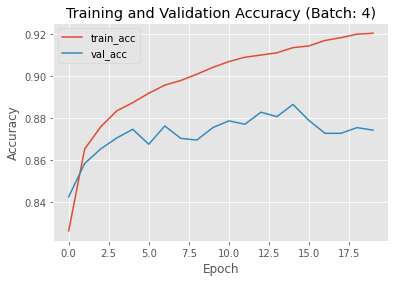

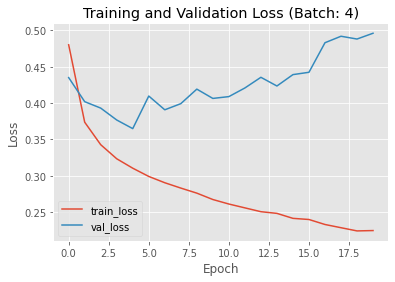

In [0]:
evaluate_model(epochs=20,
               n_batch=4,
               train_tuple=(x_train, ytrain),
               test_tuple=(x_test, ytest),
               labels=labels)

#model.save("mis_pesos.hdf5")

#### Batch 8

Epoch 1/20
7500/7500 [==============================] - 31s 4ms/step - loss: 0.4763 - accuracy: 0.8285 - val_loss: 0.4036 - val_accuracy: 0.8530
Epoch 2/20
7500/7500 [==============================] - 33s 4ms/step - loss: 0.3636 - accuracy: 0.8664 - val_loss: 0.3896 - val_accuracy: 0.8626
Epoch 3/20
7500/7500 [==============================] - 32s 4ms/step - loss: 0.3267 - accuracy: 0.8787 - val_loss: 0.3832 - val_accuracy: 0.8663
Epoch 4/20
7500/7500 [==============================] - 32s 4ms/step - loss: 0.3062 - accuracy: 0.8879 - val_loss: 0.3800 - val_accuracy: 0.8718
Epoch 5/20
7500/7500 [==============================] - 32s 4ms/step - loss: 0.2918 - accuracy: 0.8928 - val_loss: 0.3690 - val_accuracy: 0.8747
Epoch 6/20
7500/7500 [==============================] - 32s 4ms/step - loss: 0.2773 - accuracy: 0.8971 - val_loss: 0.3776 - val_accuracy: 0.8723
Epoch 7/20
7500/7500 [==============================] - 32s 4ms/step - loss: 0.2694 - accuracy: 0.9005 - val_loss: 0.4078 - val_ac

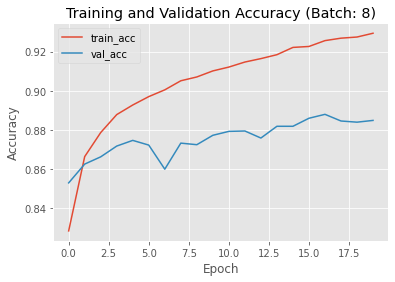

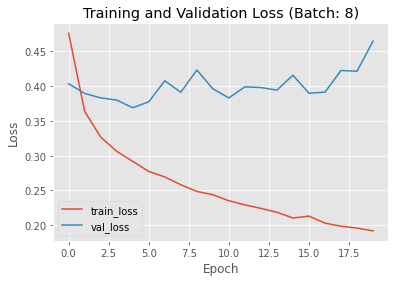

In [0]:
evaluate_model(epochs=20,
               n_batch=8,
               train_tuple=(x_train, ytrain),
               test_tuple=(x_test, ytest),
               labels=labels)

#### Batch 16

Epoch 1/20
3750/3750 [==============================] - 18s 5ms/step - loss: 0.4709 - accuracy: 0.8305 - val_loss: 0.4328 - val_accuracy: 0.8349
Epoch 2/20
3750/3750 [==============================] - 17s 5ms/step - loss: 0.3616 - accuracy: 0.8664 - val_loss: 0.3675 - val_accuracy: 0.8691
Epoch 3/20
3750/3750 [==============================] - 18s 5ms/step - loss: 0.3239 - accuracy: 0.8806 - val_loss: 0.3588 - val_accuracy: 0.8723
Epoch 4/20
3750/3750 [==============================] - 18s 5ms/step - loss: 0.3011 - accuracy: 0.8894 - val_loss: 0.3437 - val_accuracy: 0.8782
Epoch 5/20
3750/3750 [==============================] - 18s 5ms/step - loss: 0.2851 - accuracy: 0.8936 - val_loss: 0.3645 - val_accuracy: 0.8742
Epoch 6/20
3750/3750 [==============================] - 18s 5ms/step - loss: 0.2693 - accuracy: 0.8998 - val_loss: 0.3465 - val_accuracy: 0.8811
Epoch 7/20
3750/3750 [==============================] - 18s 5ms/step - loss: 0.2573 - accuracy: 0.9037 - val_loss: 0.3636 - val_ac

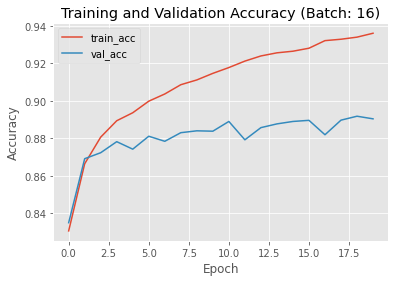

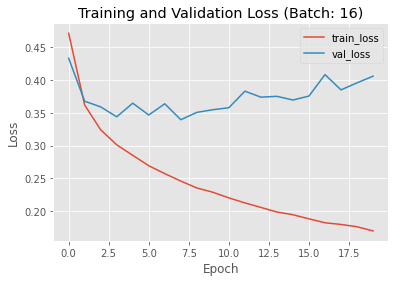

In [0]:
evaluate_model(epochs=20,
               n_batch=16,
               train_tuple=(x_train, ytrain),
               test_tuple=(x_test, ytest),
               labels=labels)

#### Batch 64

Epoch 1/20
938/938 [==============================] - 8s 9ms/step - loss: 0.4786 - accuracy: 0.8298 - val_loss: 0.4168 - val_accuracy: 0.8539
Epoch 2/20
938/938 [==============================] - 8s 9ms/step - loss: 0.3576 - accuracy: 0.8696 - val_loss: 0.3786 - val_accuracy: 0.8640
Epoch 3/20
938/938 [==============================] - 8s 9ms/step - loss: 0.3201 - accuracy: 0.8822 - val_loss: 0.3705 - val_accuracy: 0.8658
Epoch 4/20
938/938 [==============================] - 8s 9ms/step - loss: 0.2996 - accuracy: 0.8892 - val_loss: 0.3645 - val_accuracy: 0.8632
Epoch 5/20
938/938 [==============================] - 8s 9ms/step - loss: 0.2768 - accuracy: 0.8980 - val_loss: 0.3275 - val_accuracy: 0.8824
Epoch 6/20
938/938 [==============================] - 8s 9ms/step - loss: 0.2641 - accuracy: 0.9033 - val_loss: 0.3313 - val_accuracy: 0.8804
Epoch 7/20
938/938 [==============================] - 8s 9ms/step - loss: 0.2511 - accuracy: 0.9075 - val_loss: 0.3303 - val_accuracy: 0.8847
Epoch 

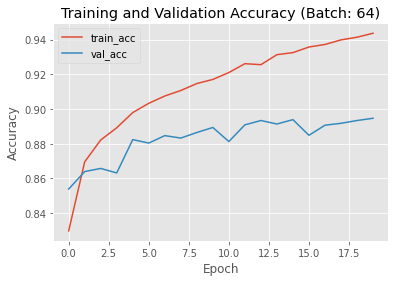

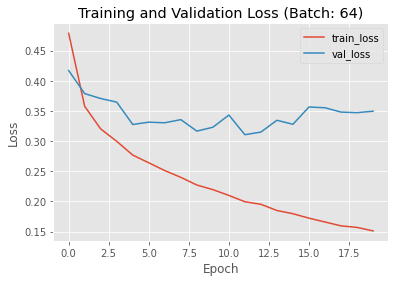

In [0]:
evaluate_model(epochs=20,
               n_batch=64,
               train_tuple=(x_train, ytrain),
               test_tuple=(x_test, ytest),
               labels=labels)

#### Batch 128

Epoch 1/20
469/469 [==============================] - 6s 14ms/step - loss: 12.3372 - accuracy: 0.7766 - val_loss: 5.7846 - val_accuracy: 0.7634
Epoch 2/20
469/469 [==============================] - 6s 14ms/step - loss: 1.3852 - accuracy: 0.8113 - val_loss: 0.6956 - val_accuracy: 0.8040
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 0.4805 - accuracy: 0.8401 - val_loss: 0.5237 - val_accuracy: 0.8407
Epoch 4/20
469/469 [==============================] - 6s 14ms/step - loss: 0.3910 - accuracy: 0.8608 - val_loss: 0.5030 - val_accuracy: 0.8464
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.3587 - accuracy: 0.8717 - val_loss: 0.4766 - val_accuracy: 0.8572
Epoch 6/20
469/469 [==============================] - 6s 14ms/step - loss: 0.3451 - accuracy: 0.8754 - val_loss: 0.4675 - val_accuracy: 0.8539
Epoch 7/20
469/469 [==============================] - 6s 14ms/step - loss: 0.3365 - accuracy: 0.8785 - val_loss: 0.4808 - val_accuracy: 0.844

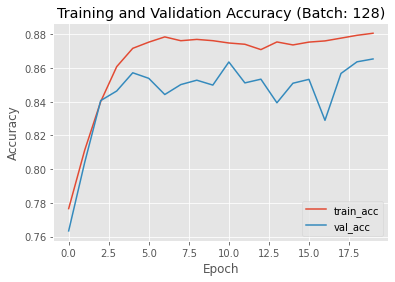

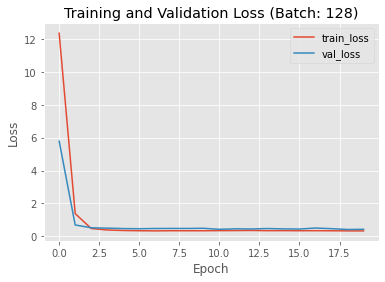

In [0]:
evaluate_model(epochs=20,
               n_batch=128,
               train_tuple=(x_train, ytrain),
               test_tuple=(x_test, ytest),
               labels=labels)

### Conclusiones ejercicio 1
*¿Cómo modifica al modelo el parámetro batch? Escribe tus conclusiones con base a tus resultados obtenidos.*

Un batch bajo incrementa el tiempo de entrenamiento, a mayor batch, el entrenamiento es más rápido.

Si bien en todos los valores de batch, el accuracy tiende a aumentar con cada epoch y el loss a disminuir, un batch bajo hace que el modelo se comporte mejor durante la etapa de entrenamiento, pero esto no se traslada cuando el modelo ve información novedosa. Dicho de otra manera, el performance en training es mejor que en datos nuevos, la red no generaliza bien y podemos sospechar un overfitting.

De manera contraria, a un número alto de batch, el accuracy y loss tienden a comportarse de manera más similar en la etapa de entrenamiento y en la etapa de prueba, el riesgo de overfitting disminuye.

## Ejercicio 2

Ejecutar el modelo del archivo original sin normalizar los datos de entrenamiento y de prueba, x_train y x_test. Es decir, sin dividir estos vectores por 255. Además, utiliza batch=128 y epochs=50. Obtener las gráficas de costo y desempeño. 

### Evaluación de modelo
Con batch=128 y epochs=50

Epoch 1/50
469/469 [==============================] - 7s 15ms/step - loss: 9.7285 - accuracy: 0.7784 - val_loss: 1.1898 - val_accuracy: 0.8032
Epoch 2/50
469/469 [==============================] - 7s 14ms/step - loss: 0.6980 - accuracy: 0.8223 - val_loss: 0.5796 - val_accuracy: 0.8204
Epoch 3/50
469/469 [==============================] - 7s 14ms/step - loss: 0.4300 - accuracy: 0.8530 - val_loss: 0.5338 - val_accuracy: 0.8382
Epoch 4/50
469/469 [==============================] - 7s 15ms/step - loss: 0.3797 - accuracy: 0.8648 - val_loss: 0.5119 - val_accuracy: 0.8437
Epoch 5/50
469/469 [==============================] - 7s 14ms/step - loss: 0.3636 - accuracy: 0.8693 - val_loss: 0.5186 - val_accuracy: 0.8362
Epoch 6/50
469/469 [==============================] - 7s 14ms/step - loss: 0.3434 - accuracy: 0.8753 - val_loss: 0.4659 - val_accuracy: 0.8459
Epoch 7/50
469/469 [==============================] - 7s 14ms/step - loss: 0.3412 - accuracy: 0.8772 - val_loss: 0.4857 - val_accuracy: 0.8548

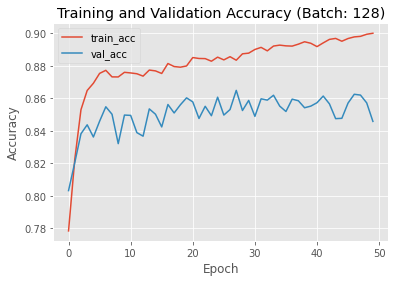

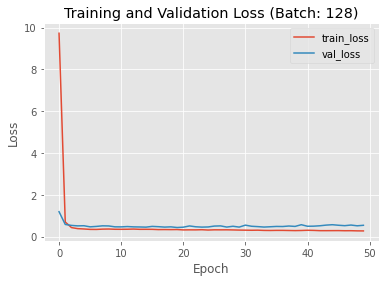

In [0]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
ytrain = tf.keras.utils.to_categorical(y_train)
ytest = tf.keras.utils.to_categorical(y_test)

evaluate_model(epochs=50,
               n_batch=128,
               train_tuple=(x_train, ytrain),
               test_tuple=(x_test, ytest),
               labels=labels)

### Conclusiones ejercicio 2
Describe tus conclusiones de los resultados obtenidos y compáralo con respecto al resultado del modelo normalizado.

El modelo sin normalizar tiene ligeramente un peor accuracy a pesar de ser sido entrenado con 50 epochs. De igual manera, el accuracy de training y el de testing se encuentran ligeramente más separado en el modelo no-normalizado, lo que podría sugerir que no está generalizando a nuevos datos tan bien como el normalizado, probablemente debido a que el no-normalizado tiene más "ruido" que el normalizado.

El loss tendió a comportarse más simétrico entre entrenamiento y prueba en el normalizado, lo que podría confirmar el supuesto que el normalizado está generalizando mejor a nuevos datos a pesar de correr con menos epochs.

## Ejercicio 3
*De los modelos obtenidos en los incisos anteriores, que puedes decir sobre si alguno de ellos está sub-entrenado (underfitting), sobre-entrenado (overfitting) o es el modelo adecuado.*

A menor número de batch, el modelo pareciera estar haciendo overfit al dataset de entrenamiento, en particular, con batch-4, esto es más notorio al ver que el loss del set de entrenamiento tiende a bajar mientras que en el set de validación tiende incluso a subir. Esto también sucede en el batch-8.

No es sino hasta batch-64 que esto empieza a aliviarse y el loss nota una pendiente negativa.

El mejor modelo es el entrenado con batch-128, se puede notar que la diferencia entre las curvas de accuracy y loss para el entrenamiento y la validación tienden a comportarse más similarmente. El loss se mantiene a la baja y el accuracy a la alta con cada epoch.

## Ejercicio 4
*Investiga en qué consiste cada uno de los siguientes métodos de optimización. Para cada caso, escribe un resumen de un párrafo indicando la manera en que funciona y la fórmula que lo define. Puedes basarte en https://keras.io/optimizers/ y las referencias que se dan a los artículos originales de dichos métodos.*

### 1. SGD - Gradiente Descendente Estocástico (Stochastic Gradient Descent)

En una gradiente descendente navegamos la pendiente de una función hasta que encontramos su punto más bajo, para encontrarlo se toman pasos hasta que la pendiente es 0, sin embargo, calcular qué tanto se debe avanzar en una curva corre el riesgo de saltar de más y perder el punto mínimo de la curva. En ML, el Learning Rate es la función que se busca minimizar. Pero hacer esto puede ser muy costoso en términos de recursos computacionales.

El SGD busca reducir la cantidad de cálculos necesarios escogiendo un punto al azar en cada iteración para no tener que probar todos los puntos en la curva.

### 2. RMSprop – Propagación de la raíz cuadrática media (Root Mean Square propagation)

Antes de hablar de RMSProp, sería bueno explicar RProp. Rprop busca combinar la idea de usar el signo de la gradiente y la idea de adaptar el tamaño del paso de manera separada para cada peso. El problema es que Rprop no funciona bien con datasets grandes.

RMSprop busca mantener el promedio de los gradientes cuadrados de los batches adyacentes cada peso y dividirlo por la raíz cuadrada de la media cuadrática.

### 3. Adagrad – Algoritmo del sub-gradiente adaptativo (Adaptive subgradient)

Similar a RMSProp. Adagrad agrega la escala del gradiente de cada elemento basado en la suma de los cuadrados históricos de cada dimensión. En otras palabras, se mantiene la suma actualizada de los gradientes cuadrados para poder adaptar el learning rate dividiéndolo entre esa suma.

Es muy útil para tratar datos muy esparcidos.

### 4. Adadelta – Algoritmo adaptativo del tamaño de paso (Adaptive learning rate)

Adadelta es una extensión de Adagrad que busca reducir el decremento agresivo y monótono del learning rate; para lograrlo, en lugar de acumular el histórico de gradiente cuadrados, Adadelta restring la ventana de acumulación de gradientes pasados a algún tamaño _w_.

La suma de estos gradientes es definido de manera recursiva como el promedio decadente de los promedios pasados.

### 5. Adam – Estimación de momento adaptativo (Adaptive moment estimation)

Adam calcula learning rates adaptativos para cada parámetro en el modelo, que, así como Adadelta y RMSProp, guarda un promedio exponencialmente decadente de gradientes cuadrados pasados, pero también guarda un decadente promedio de gradientes pasados que actúa como el momento de movimiento.

Adam puede verse como una combinación de RMSProp pero que posee momento.

Mientras que en práctica el momento puede ser conceptualizado como una pelota rodando por una pendiente, el momento de Adam se comporta más como una pelota pesada que genera frición para preferir un valor mínimo de error que se ve como plano.

### 6. Nadam – Método de Nesterov Adam.

El gradiente acelerado de Nesterov (NAG) es un momento más inteligente, permite ser adaptado con base a las diferencias del gradiente con respecto a pasos anteriores para ver si debe acelerar o desacelerar el avance en la curva.

Nadam combina Adam con NAG. Esto nos permite hacer pasos más exactos en la dirección del gradiente al actualizar los parámetros del momento antes de calcular el gradiente del paso en el que se encuentra.




## Ejercicio 5
Ejecuta el modelo del archivo original modificando en cada caso el método de optimización a cada uno de los 6 modelos estudiados en el ejercicio anterior. Obtener las gráficas de costo y desempeño.

### Evaluación de modelos
Con un batch=128 y un epoch=20

In [0]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

# Normalize the test data
x_train, x_test = x_train/255.0, x_test/255.0

ytrain = tf.keras.utils.to_categorical(y_train)
ytest = tf.keras.utils.to_categorical(y_test)

#### 1. SGD - Gradiente Descendente Estocástico (Stochastic Gradient Descent)

Epoch 1/20
469/469 [==============================] - 6s 13ms/step - loss: 0.9861 - accuracy: 0.7066 - val_loss: 0.7239 - val_accuracy: 0.7625
Epoch 2/20
469/469 [==============================] - 6s 12ms/step - loss: 0.6467 - accuracy: 0.7951 - val_loss: 0.6150 - val_accuracy: 0.7979
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 0.5723 - accuracy: 0.8161 - val_loss: 0.5667 - val_accuracy: 0.8108
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 0.5322 - accuracy: 0.8255 - val_loss: 0.5361 - val_accuracy: 0.8225
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.5063 - accuracy: 0.8320 - val_loss: 0.5164 - val_accuracy: 0.8248
Epoch 6/20
469/469 [==============================] - 6s 12ms/step - loss: 0.4875 - accuracy: 0.8375 - val_loss: 0.5018 - val_accuracy: 0.8297
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 0.4733 - accuracy: 0.8418 - val_loss: 0.4919 - val_accuracy: 0.8300

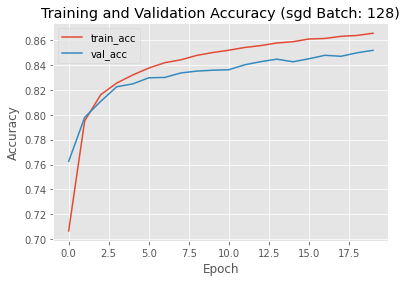

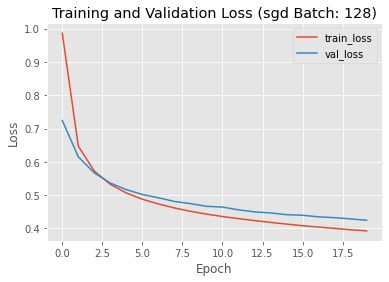

In [0]:
evaluate_model(epochs=20,
               n_batch=128,
               train_tuple=(x_train, ytrain),
               test_tuple=(x_test, ytest),
               labels=labels,
               optimizer="sgd")

#### 2. RMSprop – Propagación de la raíz cuadrática media (Root Mean Square propagation)

Epoch 1/20
469/469 [==============================] - 8s 17ms/step - loss: 0.5710 - accuracy: 0.8004 - val_loss: 0.4123 - val_accuracy: 0.8467
Epoch 2/20
469/469 [==============================] - 8s 17ms/step - loss: 0.3793 - accuracy: 0.8601 - val_loss: 0.4033 - val_accuracy: 0.8488
Epoch 3/20
469/469 [==============================] - 8s 17ms/step - loss: 0.3370 - accuracy: 0.8759 - val_loss: 0.3784 - val_accuracy: 0.8653
Epoch 4/20
469/469 [==============================] - 8s 16ms/step - loss: 0.3120 - accuracy: 0.8856 - val_loss: 0.4183 - val_accuracy: 0.8584
Epoch 5/20
469/469 [==============================] - 8s 17ms/step - loss: 0.2923 - accuracy: 0.8928 - val_loss: 0.3433 - val_accuracy: 0.8780
Epoch 6/20
469/469 [==============================] - 8s 17ms/step - loss: 0.2778 - accuracy: 0.8975 - val_loss: 0.3344 - val_accuracy: 0.8814
Epoch 7/20
469/469 [==============================] - 8s 17ms/step - loss: 0.2656 - accuracy: 0.9024 - val_loss: 0.3594 - val_accuracy: 0.8773

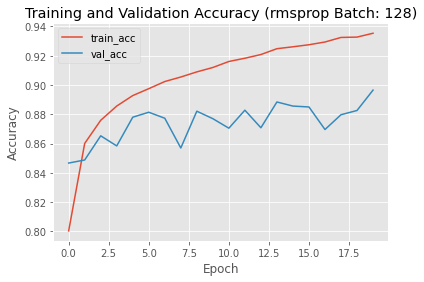

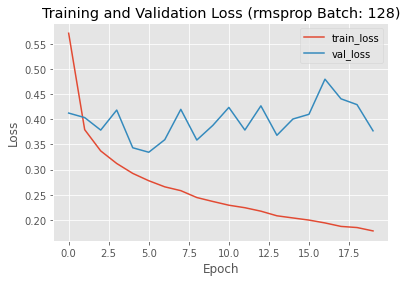

In [0]:
evaluate_model(epochs=20,
               n_batch=128,
               train_tuple=(x_train, ytrain),
               test_tuple=(x_test, ytest),
               labels=labels,
               optimizer="rmsprop")

#### 3. Adagrad – Algoritmo del sub-gradiente adaptativo (Adaptive subgradient)

Epoch 1/20
469/469 [==============================] - 6s 13ms/step - loss: 0.6019 - accuracy: 0.8044 - val_loss: 0.5197 - val_accuracy: 0.8243
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.4759 - accuracy: 0.8421 - val_loss: 0.4873 - val_accuracy: 0.8300
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 0.4455 - accuracy: 0.8508 - val_loss: 0.4618 - val_accuracy: 0.8387
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.4281 - accuracy: 0.8554 - val_loss: 0.4504 - val_accuracy: 0.8422
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.4158 - accuracy: 0.8598 - val_loss: 0.4422 - val_accuracy: 0.8452
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 0.4069 - accuracy: 0.8623 - val_loss: 0.4348 - val_accuracy: 0.8456
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 0.3991 - accuracy: 0.8649 - val_loss: 0.4292 - val_accuracy: 0.8495

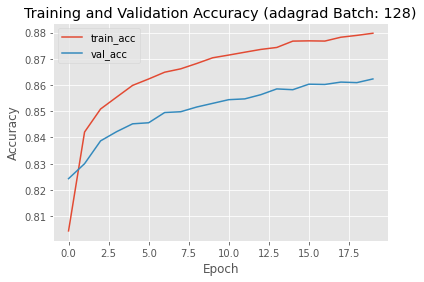

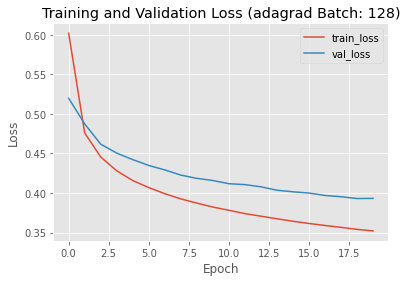

In [0]:
evaluate_model(epochs=20,
               n_batch=128,
               train_tuple=(x_train, ytrain),
               test_tuple=(x_test, ytest),
               labels=labels,
               optimizer="adagrad")

#### 4. Adadelta – Algoritmo adaptativo del tamaño de paso (Adaptive learning rate)

Epoch 1/20
469/469 [==============================] - 7s 14ms/step - loss: 2.1754 - accuracy: 0.1982 - val_loss: 1.9747 - val_accuracy: 0.4286
Epoch 2/20
469/469 [==============================] - 7s 14ms/step - loss: 1.8043 - accuracy: 0.5486 - val_loss: 1.6580 - val_accuracy: 0.6053
Epoch 3/20
469/469 [==============================] - 7s 14ms/step - loss: 1.5337 - accuracy: 0.6367 - val_loss: 1.4344 - val_accuracy: 0.6471
Epoch 4/20
469/469 [==============================] - 7s 14ms/step - loss: 1.3447 - accuracy: 0.6616 - val_loss: 1.2793 - val_accuracy: 0.6629
Epoch 5/20
469/469 [==============================] - 7s 14ms/step - loss: 1.2127 - accuracy: 0.6740 - val_loss: 1.1692 - val_accuracy: 0.6696
Epoch 6/20
469/469 [==============================] - 7s 14ms/step - loss: 1.1170 - accuracy: 0.6833 - val_loss: 1.0881 - val_accuracy: 0.6768
Epoch 7/20
469/469 [==============================] - 7s 14ms/step - loss: 1.0453 - accuracy: 0.6924 - val_loss: 1.0260 - val_accuracy: 0.6862

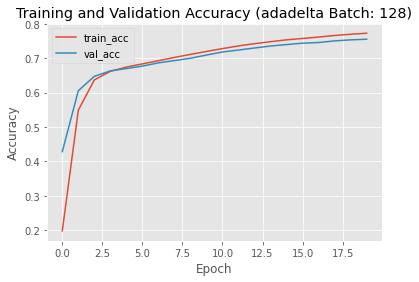

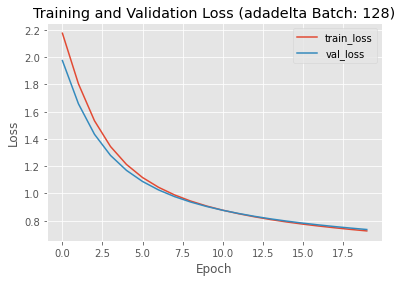

In [0]:
evaluate_model(epochs=20,
               n_batch=128,
               train_tuple=(x_train, ytrain),
               test_tuple=(x_test, ytest),
               labels=labels,
               optimizer="adadelta")

#### 5. Adam – Estimación de momento adaptativo (Adaptive moment estimation)

Epoch 1/20
469/469 [==============================] - 6s 14ms/step - loss: 0.4915 - accuracy: 0.8278 - val_loss: 0.4214 - val_accuracy: 0.8549
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.3679 - accuracy: 0.8666 - val_loss: 0.3820 - val_accuracy: 0.8633
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 0.3235 - accuracy: 0.8823 - val_loss: 0.3979 - val_accuracy: 0.8515
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.2987 - accuracy: 0.8898 - val_loss: 0.3682 - val_accuracy: 0.8652
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.2804 - accuracy: 0.8963 - val_loss: 0.3520 - val_accuracy: 0.8697
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 0.2669 - accuracy: 0.9014 - val_loss: 0.3593 - val_accuracy: 0.8718
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 0.2545 - accuracy: 0.9057 - val_loss: 0.3345 - val_accuracy: 0.8780

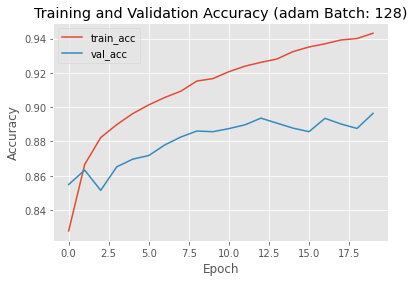

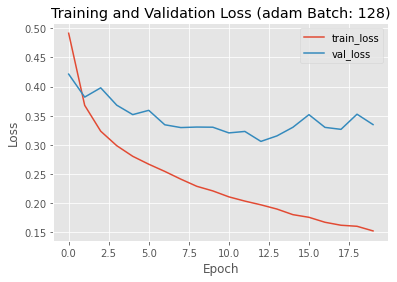

In [0]:
evaluate_model(epochs=20,
               n_batch=128,
               train_tuple=(x_train, ytrain),
               test_tuple=(x_test, ytest),
               labels=labels,
               optimizer="adam")

#### 6. Nadam – Método de Nesterov Adam.

Epoch 1/20
469/469 [==============================] - 9s 19ms/step - loss: 0.5087 - accuracy: 0.8199 - val_loss: 0.3985 - val_accuracy: 0.8561
Epoch 2/20
469/469 [==============================] - 9s 19ms/step - loss: 0.3550 - accuracy: 0.8698 - val_loss: 0.3687 - val_accuracy: 0.8664
Epoch 3/20
469/469 [==============================] - 9s 20ms/step - loss: 0.3127 - accuracy: 0.8858 - val_loss: 0.4039 - val_accuracy: 0.8533
Epoch 4/20
469/469 [==============================] - 9s 20ms/step - loss: 0.2868 - accuracy: 0.8942 - val_loss: 0.3303 - val_accuracy: 0.8807
Epoch 5/20
469/469 [==============================] - 9s 20ms/step - loss: 0.2670 - accuracy: 0.9005 - val_loss: 0.3479 - val_accuracy: 0.8758
Epoch 6/20
469/469 [==============================] - 9s 20ms/step - loss: 0.2514 - accuracy: 0.9067 - val_loss: 0.3194 - val_accuracy: 0.8859
Epoch 7/20
469/469 [==============================] - 9s 20ms/step - loss: 0.2367 - accuracy: 0.9109 - val_loss: 0.3242 - val_accuracy: 0.8871

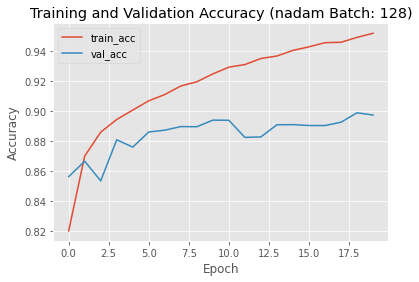

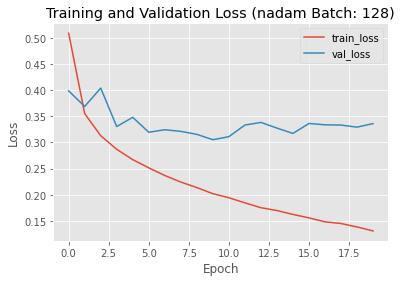

In [0]:
evaluate_model(epochs=20,
               n_batch=128,
               train_tuple=(x_train, ytrain),
               test_tuple=(x_test, ytest),
               labels=labels,
               optimizer="nadam")

### Conclusiones ejercicio 5
*Redacta tus conclusiones comparando los resultados. ¿Cuál o cuáles métodos se comportaron mejor? ¿Cuáles fueron los peores?*

#### 1. SGD - Gradiente Descendente Estocástico (Stochastic Gradient Descent)

*Tiempo: 194s*

Los resultados se ven muy bien, aunque el accuracy podría ser mejor, se puede apreciar que el modelo generalizó relativamente bien, y el loss se mantuvo en una pendiente negativa.

#### 2. RMSprop – Propagación de la raíz cuadrática media (Root Mean Square propagation)

*Tiempo: 262s*

Los resultados no son buenos, el accuracy en entrenamiento, si bien llegó por encima del 90%, el modelo no generalizó bien a los datos de validación, cuyo accuracy no se mantuvo constante y se mantuvo por debajo del 90%.

El loss tampoco se aprecia un buen resultado, la pendiente no se aprecia a la baja.

Dado esto, podríamos asumir que se presenta un overfit a los datos de entrenamiento.

#### 3. Adagrad – Algoritmo del sub-gradiente adaptativo (Adaptive subgradient)

*Tiempo: 205s*

El modelo alcanzó un accuracy de los altos 80%, y si bien generalizó de manera relativamente aceptable, se nota una separación mayor entre el las curvas de entrenamiento y de validación.

#### 4. Adadelta – Algoritmo adaptativo del tamaño de paso (Adaptive learning rate)
*Tiempo: 227s*

El modelo generalizó excepcionalmente bien, las curvas de accuracy y de loss tanto en entrenamiento se mantuvieron relativamente iguales.

Sin embargo, el porcentage de accuracy promedio se mantuvo por debajo del 80%. Tal vez con más datos de entrenamiento, el accuracy podría subir un poco más.

#### 5. Adam – Estimación de momento adaptativo (Adaptive moment estimation)

*Tiempo: 211s*

El índice de accuracy en pruebas rozó el 90%, pero si bien el accuracy tiene una pendiente positiva en los datos de prueba, el modelo está teniendo problemas en generalizar de manera aceptable a los datos de prueba.

La curva de loss tiene una pendiente sólo ligeramente negativa y no comparte la misma pendiente que el resultado obtenido en entrenamiento, reforzando el hecho de que puede haber overfit.

Adam sólo tuvo un rendimiento ligeramente mejor que RMSProp.

#### 6. Nadam – Método de Nesterov Adam.

*Tiempo: 311s*

Es el optimizador que más tiempo tardó en ejecutarse.

Los resultados son muy similares a los obtenidos por Adam, por lo que, dado la diferencia de 100 segundos de tiempo de ejecución entre Adam y Nadam, podemos asumir que no hay una ventaja real en este dataset a usar Adam con momento Nesterov, de hecho, los resultados sugieren que es mejor opción usar Adam simple.

Dado que los resultados son muy similares a los de Adam, las conclusiones son prácticamente idénticas.

El modelo pareciera tener problemas en generalizar, lo que sugiere un overfit a los datos de entrenamiento. La curva de loss tiene una pendiente sólo ligeramente negativa, lo cual refuerza la observación de un overfit.

---
### Conclusiones generales

Haciendo un ordenamiento de mejores resultados a peores resultados de los optimizadores, y con base a las observaciones de cada uno y los datos obtenidos y buscando un modelo que generalize bien y que tenga un buen accuracy:

1. Adadelta
2. SGD
3. Adagrad
4. Adam
5. Nadam
6. RMSProp


